In [26]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import zipfile

In [2]:
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
100%|███████████████████████████████████████▊| 177M/178M [00:10<00:00, 19.3MB/s]
100%|████████████████████████████████████████| 178M/178M [00:10<00:00, 17.2MB/s]


In [75]:
# 解壓縮
import zipfile
# 檔案名稱
file='./online-payments-fraud-detection-dataset.zip'
ZIP = zipfile.ZipFile(file)
ZIP.extractall()
ZIP.close()

In [76]:
dta = pd.read_csv('./PS_20174392719_1491204439457_log.csv', index_col=0)

In [77]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362620 entries, 1 to 743
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 534.0+ MB


In [78]:
print(dta.columns)
dta.head()

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [79]:
# Insure whether data contain the NA value
dta.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

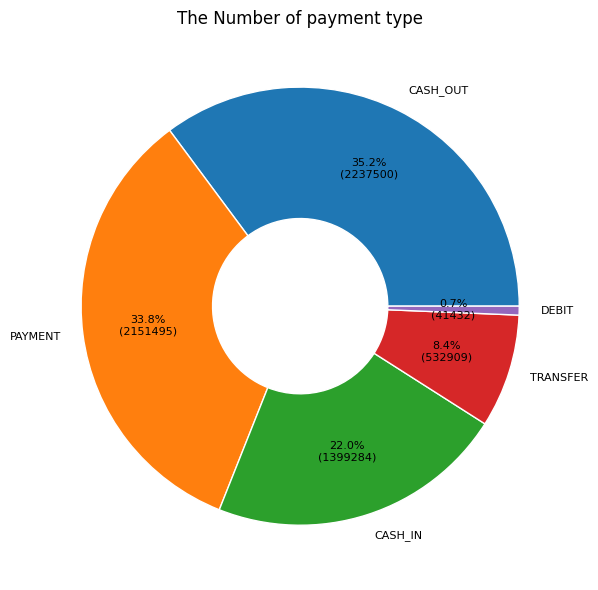

In [80]:
counter = dta['type'].value_counts()
def func(s,d):
    t = int(round(s/100.*sum(d)))
    return f'{s:.1f}%\n({t})'

plt.figure(figsize = (12,6))
# 也可以用 import plotly.express as px
plt.pie(counter, labels= ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
        autopct= lambda i: func(i,counter),
       radius= 1, pctdistance=0.7,
       wedgeprops= {'edgecolor':'w', 'linewidth':1,'width':0.6},
       textprops={'size':8})
plt.title('The Number of payment type')
plt.tight_layout()
plt.show()

In [81]:
dta['type'] = dta['type'].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
dta['isFraud'] = dta['isFraud'].map({0:'NoFraud',1:'Fraud'})
dta.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,NoFraud,0
1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,NoFraud,0
1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,NoFraud,0


In [95]:
# Using Machine learning to classify the trad is Fraud or not.

x = np.array(dta[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(dta[['isFraud']])
                   
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2)

# Based on it is classification, we use decision tree to prediction 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
prdt = model.predict(x_test)
mse = accuracy_score(y_test,prdt)

print('R_squre:',round(model.score(x_test, y_test),3))

R_squre: 1.0
